<a href="https://colab.research.google.com/github/LucasMirandaVS/Exerc-cios_Python/blob/main/Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series



In [2]:
!pip install -q yfinance

     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
!pip install -q quandl

In [5]:
import yfinance as yf
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Gerando uma série mensal  e um df com a função date.range
n  = 500
index = pd.date_range(start = '2018-1-1', periods = n, freq = 'd')
values = np.random.standard_normal(size = n)

df = pd.DataFrame({'Data': values}, index = index)

In [9]:
df

,Data
2018-01-01,0.099934
2018-01-02,0.951717
2018-01-03,0.728039
2018-01-04,0.445557
2018-01-05,1.057201
...,...
2019-05-11,-0.910105
2019-05-12,-0.483316
2019-05-13,-2.025663
2019-05-14,-1.192113


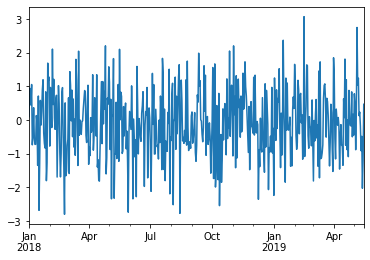

In [10]:
df.Data.plot(); # é um clássico cso de rúido branco. Não é atoa, pois são dados gerados aleatoriamente

# Agora fazendo visualizações de séries de preço reais

In [11]:
vale = yf.Ticker('VALE3.SA').history(period = 'max')

In [12]:
vale.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,1.795995,1.817803,1.795995,1.795995,585600,0.0,0.0
2000-01-04,1.778890,1.782738,1.753233,1.753233,782400,0.0,0.0
2000-01-05,1.731852,1.753233,1.731852,1.753233,1876800,0.0,0.0
2000-01-06,1.753233,1.795995,1.753233,1.753233,792000,0.0,0.0
2000-01-07,1.774614,1.826355,1.774614,1.817375,5347200,0.0,0.0


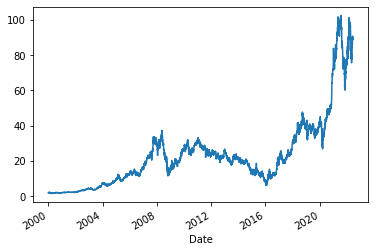

In [13]:
vale.Close.plot();

In [14]:
# pega os últimos 5 dias
vale.last('5D').shape

(3, 7)

In [15]:
# pega os últimos 6 meses
vale.last('3M').head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-01,96.779999,97.500000,96.070000,96.959999,22457700,0.0,0.0
2022-04-04,96.769997,98.250000,96.550003,97.940002,16914000,0.0,0.0
2022-04-05,97.360001,97.779999,94.820000,95.110001,25764400,0.0,0.0
2022-04-06,95.330002,96.720001,95.330002,96.550003,22615800,0.0,0.0
2022-04-07,95.500000,97.690002,95.139999,97.129997,19946600,0.0,0.0


In [17]:
# pega os últimos 2 anos
vale.last('2Y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,73.140873,74.884471,72.731579,74.868095,37865500,0.0,0.0
2021-01-05,74.868096,76.128723,74.098621,76.128723,34300300,0.0,0.0
2021-01-06,77.749530,78.870992,77.274747,78.625420,53722500,0.0,0.0
2021-01-07,79.083826,83.929868,79.083826,83.757965,74541400,0.0,0.0
2021-01-08,84.322793,84.601111,80.385379,83.496017,58562700,0.0,0.0
...,...,...,...,...,...,...,...
2022-06-02,90.000000,90.279999,89.000000,89.900002,25142400,0.0,0.0
2022-06-03,89.500000,89.809998,88.360001,88.459999,18431900,0.0,0.0
2022-06-06,89.639999,89.790001,88.550003,88.550003,14932800,0.0,0.0


In [19]:
# pega os primeiros 30 dias
vale.first('30D')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,1.795995,1.817803,1.795995,1.795995,585600,0.0,0.0
2000-01-04,1.778890,1.782738,1.753233,1.753233,782400,0.0,0.0
2000-01-05,1.731852,1.753233,1.731852,1.753233,1876800,0.0,0.0
2000-01-06,1.753233,1.795995,1.753233,1.753233,792000,0.0,0.0
2000-01-07,1.774614,1.826355,1.774614,1.817375,5347200,0.0,0.0
2000-01-10,1.924280,1.967042,1.924280,1.967042,2980800,0.0,0.0
2000-01-11,1.967042,1.979870,1.954213,1.971318,326400,0.0,0.0
2000-01-12,1.975594,2.009804,1.971318,1.990561,5068800,0.0,0.0
2000-01-13,2.056841,2.056841,2.056841,2.056841,120000,0.0,0.0


In [20]:
# pega os primeiros 3 meses
vale.first('3M')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,1.795995,1.817803,1.795995,1.795995,585600,0.0,0.0
2000-01-04,1.778890,1.782738,1.753233,1.753233,782400,0.0,0.0
2000-01-05,1.731852,1.753233,1.731852,1.753233,1876800,0.0,0.0
2000-01-06,1.753233,1.795995,1.753233,1.753233,792000,0.0,0.0
2000-01-07,1.774614,1.826355,1.774614,1.817375,5347200,0.0,0.0
...,...,...,...,...,...,...,...
2000-03-27,1.667709,1.689090,1.646328,1.689090,1262400,0.0,0.0
2000-03-28,1.667709,1.710044,1.603567,1.637776,1233600,0.0,0.0
2000-03-29,1.667709,1.671985,1.603567,1.668564,772800,0.0,0.0


In [21]:
# pega os primeiros 2 anos
vale.first('2Y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,1.795995,1.817803,1.795995,1.795995,585600,0.0,0.0
2000-01-04,1.778890,1.782738,1.753233,1.753233,782400,0.0,0.0
2000-01-05,1.731852,1.753233,1.731852,1.753233,1876800,0.0,0.0
2000-01-06,1.753233,1.795995,1.753233,1.753233,792000,0.0,0.0
2000-01-07,1.774614,1.826355,1.774614,1.817375,5347200,0.0,0.0
...,...,...,...,...,...,...,...
2001-12-25,2.253545,2.253545,2.253545,2.253545,0,0.0,0.0
2001-12-26,2.253546,2.253546,2.215060,2.244994,7828800,0.0,0.0
2001-12-27,2.249270,2.283479,2.249270,2.274926,988800,0.0,0.0


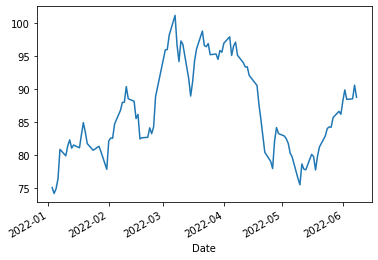

In [22]:
vale.loc['2022']['Close'].plot()

In [23]:
vale.loc['2019-1-1':]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,38.280606,39.321631,38.112207,39.107304,17319600,0.0,0.0
2019-01-03,38.885314,38.992478,37.048214,37.507488,30120000,0.0,0.0
2019-01-04,38.135166,40.148324,38.135166,39.949303,43360100,0.0,0.0
2019-01-07,40.469822,41.066882,39.589545,39.734982,20998900,0.0,0.0
2019-01-08,39.956961,40.416235,39.512993,40.117706,19925600,0.0,0.0
...,...,...,...,...,...,...,...
2022-06-02,90.000000,90.279999,89.000000,89.900002,25142400,0.0,0.0
2022-06-03,89.500000,89.809998,88.360001,88.459999,18431900,0.0,0.0
2022-06-06,89.639999,89.790001,88.550003,88.550003,14932800,0.0,0.0


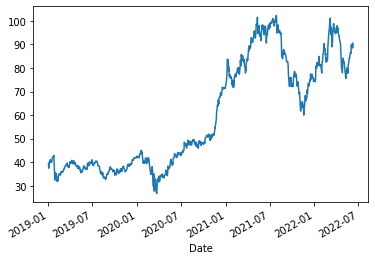

In [24]:
vale.loc['2019-1-1':].Close.plot();

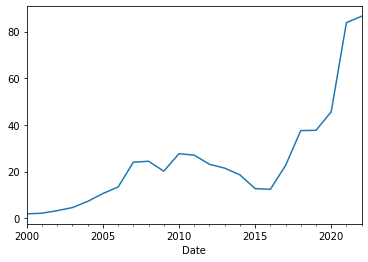

In [25]:
# Business year end
vale['Close'].resample('BA').mean().plot()

In [26]:
# Year
vale['Close'].resample('Y').mean()

Date
2000-12-31     1.834835
2001-12-31     2.148963
2002-12-31     3.225506
2003-12-31     4.561032
2004-12-31     7.218610
2005-12-31    10.565370
2006-12-31    13.371952
2007-12-31    23.997318
2008-12-31    24.411972
2009-12-31    20.160622
2010-12-31    27.650130
2011-12-31    27.017120
2012-12-31    23.118111
2013-12-31    21.454249
2014-12-31    18.592248
2015-12-31    12.683999
2016-12-31    12.362974
2017-12-31    22.574928
2018-12-31    37.554684
2019-12-31    37.664018
2020-12-31    45.584048
2021-12-31    83.808354
2022-12-31    86.558561
Freq: A-DEC, Name: Close, dtype: float64

In [27]:
# weekly
vale['Close'].resample('W').mean()

Date
2000-01-09     1.774614
2000-01-16     2.016218
2000-01-23     2.067959
2000-01-30     2.049144
2000-02-06     1.981581
                ...    
2022-05-15    77.286000
2022-05-22    79.766000
2022-05-29    84.246001
2022-06-05    87.892000
2022-06-12    89.320002
Freq: W-SUN, Name: Close, Length: 1171, dtype: float64

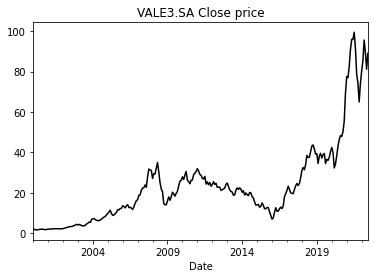

In [28]:
vale['Close'].resample('M').mean().plot(color = 'k')
plt.title('VALE3.SA Close price');

In [29]:
# Apruando a classificação
vale['day'] = vale.index.day
vale['weekday'] = vale.index.weekday
vale['dayofweek'] = vale.index.dayofweek
vale['weekofyear'] = vale.index.weekofyear
vale['quarter'] = vale.index.quarter
vale['quarter_start'] = vale.index.is_quarter_start
vale['quarter_end'] = vale.index.is_quarter_end
vale['year'] = vale.index.year
vale['month'] = vale.index.month
vale['month_start'] = vale.index.is_month_start
vale['month_end'] = vale.index.is_month_end

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [30]:
vale

,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,weekday,dayofweek,weekofyear,quarter,quarter_start,quarter_end,year,month,month_start,month_end
Date,,,,,,,,,,,,,,,,,,
2000-01-03,1.795995,1.817803,1.795995,1.795995,585600,0.0,0.0,3,0,0,1,1,False,False,2000,1,False,False
2000-01-04,1.778890,1.782738,1.753233,1.753233,782400,0.0,0.0,4,1,1,1,1,False,False,2000,1,False,False
2000-01-05,1.731852,1.753233,1.731852,1.753233,1876800,0.0,0.0,5,2,2,1,1,False,False,2000,1,False,False
2000-01-06,1.753233,1.795995,1.753233,1.753233,792000,0.0,0.0,6,3,3,1,1,False,False,2000,1,False,False
2000-01-07,1.774614,1.826355,1.774614,1.817375,5347200,0.0,0.0,7,4,4,1,1,False,False,2000,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02,90.000000,90.279999,89.000000,89.900002,25142400,0.0,0.0,2,3,3,22,2,False,False,2022,6,False,False
2022-06-03,89.500000,89.809998,88.360001,88.459999,18431900,0.0,0.0,3,4,4,22,2,False,False,2022,6,False,False
2022-06-06,89.639999,89.790001,88.550003,88.550003,14932800,0.0,0.0,6,0,0,23,2,False,False,2022,6,False,False
